In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df_train = pd.read_csv(r'/content/df_train.csv', encoding='latin-1')
df_test = pd.read_csv(r'/content/df_test.csv', encoding='latin-1')
print("Training Data Shape:", df_train.shape)
print("Test Data Shape:", df_test.shape)

Training Data Shape: (13603, 14)
Test Data Shape: (6700, 14)


In [ ]:
print(df_train.head())

         date     price  bedrooms  grade  has_basement  living_in_m2  \
0  2014-05-15  312000.0         2      2          True     138.42547   
1  2014-11-14  310000.0         2      2         False     105.90942   
2  2014-12-24  320000.0         2      2         False     117.98681   
3  2015-02-22  264500.0         2      3         False     151.43189   
4  2015-01-06  700000.0         3      2          True     341.88304   

   renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
0      False      False              False               2          True   
1      False      False              False               1          True   
2      False       True              False               1         False   
3      False      False              False               2          True   
4      False      False              False               3         False   

   single_floor  month  quartile_zone  
0         False      5              1  
1         False     11        

In [ ]:
print(df_train.info())
print(df_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13603 entries, 0 to 13602
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               13603 non-null  object 
 1   price              13603 non-null  float64
 2   bedrooms           13603 non-null  int64  
 3   grade              13603 non-null  int64  
 4   has_basement       13603 non-null  bool   
 5   living_in_m2       13603 non-null  float64
 6   renovated          13603 non-null  bool   
 7   nice_view          13603 non-null  bool   
 8   perfect_condition  13603 non-null  bool   
 9   real_bathrooms     13603 non-null  int64  
 10  has_lavatory       13603 non-null  bool   
 11  single_floor       13603 non-null  bool   
 12  month              13603 non-null  int64  
 13  quartile_zone      13603 non-null  int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 930.0+ KB
None
date                 0
price                0

In [ ]:
print(df_train[['price', 'bedrooms', 'grade', 'living_in_m2', 'real_bathrooms', 'month', 'quartile_zone']].describe())

              price      bedrooms         grade  living_in_m2  real_bathrooms  \
count  1.360300e+04  13603.000000  13603.000000  13603.000000    13603.000000   
mean   4.752861e+05      2.238624      2.530177    181.746181        1.678968   
std    2.073232e+05      0.682151      0.969782     67.917214        0.627218   
min    8.100000e+04      1.000000      1.000000     49.238590        1.000000   
25%    3.150000e+05      2.000000      2.000000    130.064200        1.000000   
50%    4.350000e+05      2.000000      2.000000    171.870550        2.000000   
75%    5.999500e+05      3.000000      3.000000    224.825260        2.000000   
max    1.155000e+06      3.000000      5.000000    391.121630        3.000000   

              month  quartile_zone  
count  13603.000000   13603.000000  
mean       6.579872       2.425568  
std        3.126552       1.071046  
min        1.000000       1.000000  
25%        4.000000       2.000000  
50%        6.000000       2.000000  
75%        

In [ ]:
boolean_cols = ['has_basement', 'renovated', 'nice_view', 'perfect_condition', 'has_lavatory', 'single_floor']
for col in boolean_cols:
    print(df_train[col].value_counts())

has_basement
False    8479
True     5124
Name: count, dtype: int64
renovated
False    13074
True       529
Name: count, dtype: int64
nice_view
False    12560
True      1043
Name: count, dtype: int64
perfect_condition
False    12591
True      1012
Name: count, dtype: int64
has_lavatory
True     9262
False    4341
Name: count, dtype: int64
single_floor
True     6966
False    6637
Name: count, dtype: int64


In [ ]:
price_bounds = df_train['price'].quantile([0.01, 0.99])
df_train['price'] = df_train['price'].clip(lower=price_bounds.iloc[0], upper=price_bounds.iloc[1])
df_test['price'] = df_test['price'].clip(lower=price_bounds.iloc[0], upper=price_bounds.iloc[1])

Text(0, 0.5, 'Frequency')

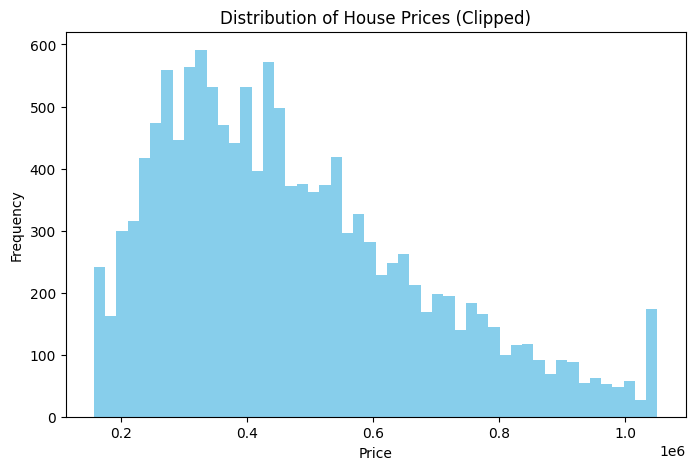

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df_train['price'], bins=50, color='skyblue')
plt.title('Distribution of House Prices (Clipped)')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Correlation Heatmap')

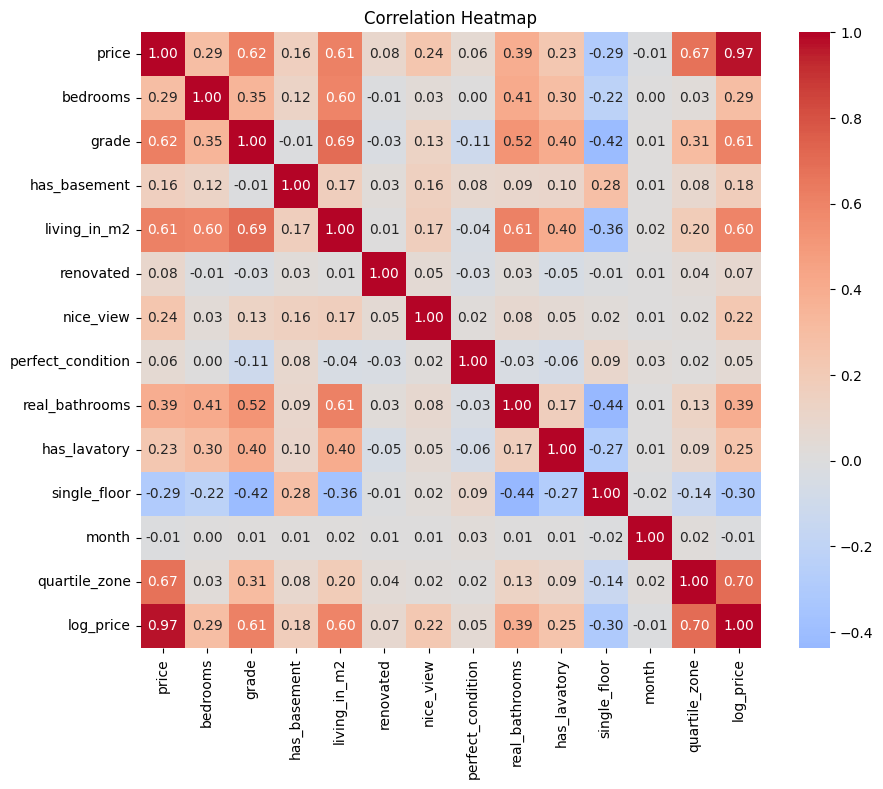

In [ ]:
df_train['log_price'] = np.log1p(df_train['price'])
correlations = df_train.drop(columns=['date']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

In [ ]:
df_train_processed = df_train.drop(columns=['date'])
for col in boolean_cols:
    df_train_processed[col] = df_train_processed[col].astype(int)
X = df_train_processed.drop(columns=['price', 'log_price'])
y = df_train_processed['log_price']

In [ ]:
df_test_processed = df_test.drop(columns=['date'])
for col in boolean_cols:
    df_test_processed[col] = df_test_processed[col].astype(int)
df_test_processed['log_price'] = np.log1p(df_test_processed['price'])
X_test = df_test_processed.drop(columns=['price', 'log_price'])
y_test = df_test_processed['log_price']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

## Model 1

In [ ]:
model1 = Ridge(alpha=1.0)
model1.fit(X_scaled, y)

Ridge()

## Model 2

In [ ]:
top_features = [X.columns.tolist().index('quartile_zone'),
                X.columns.tolist().index('grade'),
                X.columns.tolist().index('living_in_m2'),
                X.columns.tolist().index('real_bathrooms')]
X_top = X_scaled[:, top_features]
X_test_top = X_test_scaled[:, top_features]
model2 = LinearRegression()
model2.fit(X_top, y)

LinearRegression()

## Model 3

In [ ]:
minimal_feature = [X.columns.tolist().index('living_in_m2')]
X_minimal = X_scaled[:, minimal_feature]
X_test_minimal = X_test_scaled[:, minimal_feature]
model3 = LinearRegression()
model3.fit(X_minimal, y)

LinearRegression()

In [ ]:
y_pred1 = model1.predict(X_scaled)
y_pred2 = model2.predict(X_top)
y_pred3 = model3.predict(X_minimal)

In [ ]:
print("Training Performance:")
print("Model 1 (All Features, Ridge) - MSE:", mean_squared_error(y, y_pred1), "R²:", r2_score(y, y_pred1))
print("Model 2 (Top Features) - MSE:", mean_squared_error(y, y_pred2), "R²:", r2_score(y, y_pred2))
print("Model 3 (Minimal Feature) - MSE:", mean_squared_error(y, y_pred3), "R²:", r2_score(y, y_pred3))

Training Performance:
Model 1 (All Features, Ridge) - MSE: 0.045992785090839844 R²: 0.7574816697306723
Model 2 (Top Features) - MSE: 0.05168530147991616 R²: 0.7274652320006484
Model 3 (Minimal Feature) - MSE: 0.12112486099435354 R²: 0.3613128888707915


Text(0, 0.5, 'Predicted Log(Price)')

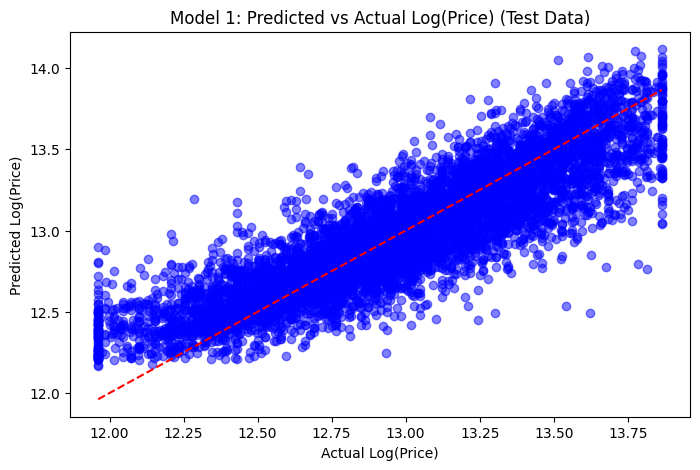

In [ ]:
y_test_pred1 = model1.predict(X_test_scaled)
y_test_pred2 = model2.predict(X_test_top)
y_test_pred3 = model3.predict(X_test_minimal)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred1, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Model 1: Predicted vs Actual Log(Price) (Test Data)')
plt.xlabel('Actual Log(Price)')
plt.ylabel('Predicted Log(Price)')

In [ ]:
print("Test Performance:")
print("Model 1 (All Features, Ridge) - MSE:", mean_squared_error(y_test, y_test_pred1), "R²:", r2_score(y_test, y_test_pred1))
print("Model 2 (Top Features) - MSE:", mean_squared_error(y_test, y_test_pred2), "R²:", r2_score(y_test, y_test_pred2))
print("Model 3 (Minimal Feature) - MSE:", mean_squared_error(y_test, y_test_pred3), "R²:", r2_score(y_test, y_test_pred3))

Test Performance:
Model 1 (All Features, Ridge) - MSE: 0.047341355984789994 R²: 0.7568661435644439
Model 2 (Top Features) - MSE: 0.05284330485693984 R²: 0.7286094529950644
Model 3 (Minimal Feature) - MSE: 0.12405941867316381 R²: 0.36286056320713644


In [ ]:
accuracy1 = np.mean(np.abs((y_test_pred1_original - y_test_original) / y_test_original) <= 0.1)
accuracy2 = np.mean(np.abs((y_test_pred2_original - y_test_original) / y_test_original) <= 0.1)
accuracy3 = np.mean(np.abs((y_test_pred3_original - y_test_original) / y_test_original) <= 0.1)
print("Test Performance (Original Price Scale):")
print("Model 1 - MSE:", mean_squared_error(y_test_original, y_test_pred1_original), "Accuracy (within 10%):", accuracy1)
print("Model 2 - MSE:", mean_squared_error(y_test_original, y_test_pred2_original), "Accuracy (within 10%):", accuracy2)
print("Model 3 - MSE:", mean_squared_error(y_test_original, y_test_pred3_original), "Accuracy (within 10%):", accuracy3)

Test Performance (Original Price Scale):
Model 1 - MSE: 12422024517.099426 Accuracy (within 10%): 0.36776119402985075
Model 2 - MSE: 14434235127.91375 Accuracy (within 10%): 0.33671641791044776
Model 3 - MSE: 28147782973.35514 Accuracy (within 10%): 0.19597014925373135
